<h1 style="color:rgb(0,120,170)">Neural Networks and Deep Learning</h1>
<h2 style="color:rgb(0,120,170)">Linear Algebra Basics</h2>

[Source](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-Introduction/)     
[Github](https://github.com/hadrienj/deepLearningBook-Notes)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot style
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)

Populating the interactive namespace from numpy and matplotlib


In [3]:
%%html
<style>
.pquote {
  text-align: left;
  margin: 40px 0 40px auto;
  width: 70%;
  font-size: 1.5em;
  font-style: italic;
  display: block;
  line-height: 1.3em;
  color: #5a75a7;
  font-weight: 600;
  border-left: 5px solid rgba(90, 117, 167, .1);
  padding-left: 6px;
}
.notes {
  font-style: italic;
  display: block;
  margin: 40px 10%;
}
img + em {
  text-align: center;
  display: block;
  color: gray;
  font-size: 0.9em;
  font-weight: 600;
}
</style>

In [4]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        if (isinstance(alpha, list)):
            alpha_i = alpha[i]
        else:
            alpha_i = alpha
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                  alpha=alpha_i)

$$
\newcommand\norm[1]{\left\lVert#1\right\rVert} 
\DeclareMathOperator{\Tr}{Tr}
\newcommand\bs[1]{\boldsymbol{#1}}
$$

<span class='notes'>
    This content is part of a series following the chapter 2 on linear algebra from the [Deep Learning Book](http://www.deeplearningbook.org/) by Goodfellow, I., Bengio, Y., and Courville, A. (2016). It aims to provide intuitions/drawings/python code on mathematical theories and is constructed as my understanding of these concepts. You can check the syllabus in the [introduction post](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-Introduction/).
</span>

# Introduction

This chapter is also very light! We will see what is the meaning of the determinant of a matrix. This special number can tell us a lot of things about our matrix!

# 2.11 The determinant

We saw in [2.8](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/) that a matrix can be seen as a linear transformation of the space. The determinant of a matrix $\bs{A}$ is a number corresponding to the *multiplicative change* you get when you transform your space with this matrix (see a comment by Pete L. Clark in [this SE question](https://math.stackexchange.com/questions/668/whats-an-intuitive-way-to-think-about-the-determinant)). A negative determinant means that there is a change in orientation (and not just a rescaling and/or a rotation). As outlined by Nykamp DQ on [Math Insight](https://mathinsight.org/determinant_linear_transformation), a change in orientation means for instance in 2D that we take a plane out of these 2 dimensions, do some transformations and get back to the initial 2D space. Here is an example distinguishing between positive and negative determinant:

<img src="images/positive-negative-determinant.png" width="400" alt="Comparison of positive and negative determinant" title="Comparison of the effect of positive and negative determinants">
<em>The determinant of a matrix can tell you a lot of things about the transformation associated with this matrix</em>

You can see that the second transformation can't be obtained through rotation and rescaling. Thus the sign can tell you the nature of the transformation associated with the matrix!

In addition, the determinant also gives you the *amount* of transformation. If you take the *n*-dimensional unit cube and apply the matrix $\bs{A}$ on it, the absolute value of the determinant corresponds to the area of the transformed figure. You might believe me more easily after the following example.

### Example 1.

To calculate the area of the shapes, we will use simple squares in 2 dimensions. The unit square area can be calculated with the Pythagorean theorem taking the two unit vectors.

<img src="images/unit-square-area.png" width="300" alt="Illustration of the unit square area and the unit vectors in two dimensions" title="The unit square area">
<em>The unit square area</em>

The lengths of $i$ and $j$ are $1$ thus the area of the unit square is $1$.

Let's start by creating both vectors in Python:

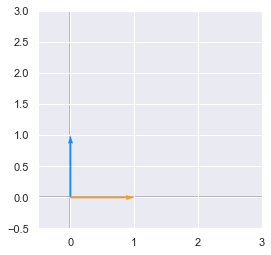

In [5]:
orange = '#FF9A13'
blue = '#1190FF'
    
i = [0, 1]
j = [1, 0]

plotVectors([i, j], [[blue], [orange]])
plt.xlim(-0.5, 3)
plt.ylim(-0.5, 3)
plt.show()

We will apply

$$
\bs{A}=\begin{bmatrix}
    2 & 0\\\\
    0 & 2
\end{bmatrix}
$$

to $i$ and $j$. You can notice that this matrix is special: it is diagonal. So it will only rescale our space. No rotation here. More precisely, it will rescale each dimension the same way because the diagonal values are identical. Let's create the matrix $\bs{A}$:

In [6]:
A = np.array([[2, 0], [0, 2]])
A

array([[2, 0],
       [0, 2]])

Now we will apply $\bs{A}$ on our two unit vectors $i$ and $j$ and plot the resulting new vectors:

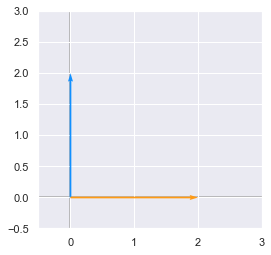

In [7]:
new_i = A.dot(i)
new_j = A.dot(j)
plotVectors([new_i, new_j], [['#1190FF'], ['#FF9A13']])
plt.xlim(-0.5, 3)
plt.ylim(-0.5, 3)
plt.show()

As expected, we can see that the square corresponding to $i$ and $j$ didn't rotate but the lengths of $i$ and $j$ have doubled. We will now calculate the determinant of $\bs{A}$ (you can go to the [Wikipedia article](https://en.wikipedia.org/wiki/Determinant) for more details about the calculation of the determinant):

<img src="images/unit-square-area-transformed.png" width="300" alt="Areas of the unit square and its transformation by the matrix" title="The transformed unit square">
<em>The unit square transformed by the matrix</em>

In [8]:
np.linalg.det(A)

4.0

And yes, the transformation have multiplied the area of the unit square by 4. The lengths of $new_i$ and $new_j$ are $2$ (thus $2\cdot2=4$).

### Example 2.

Let's see now an example of negative determinant.

We will transform the unit square with the matrix:

$$
\bs{B}=\begin{bmatrix}
    -2 & 0\\\\
    0 & 2
\end{bmatrix}
$$

Its determinant is $-4$:

In [9]:
B = np.array([[-2, 0], [0, 2]])
np.linalg.det(B)

-4.0

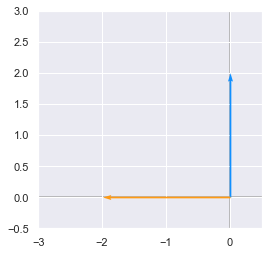

In [10]:
new_i_1 = B.dot(i)
new_j_1 = B.dot(j)
plotVectors([new_i_1, new_j_1], [['#1190FF'], ['#FF9A13']])
plt.xlim(-3, 0.5)
plt.ylim(-0.5, 3)
plt.show()

We can see that the matrices with determinant $2$ and $-2$ modified the area of the unit square the same way.

<img src="images/unit-square-area-transformed-1.png" width="300" alt="Areas of the unit square and its transformation by the matrix with a negative determinant" title="The transformed unit square">
<em>The unit square transformed by the matrix with a negative determinant</em>

The absolute value of the determinant shows that, as in the first example, the area of the new square is 4 times the area of the unit square. But this time, it was not just a rescaling but also a transformation. It is not obvious with only the unit vectors so let's transform some random points. We will use the matrix

$$
\bs{C}=\begin{bmatrix}
    -1 & 0\\\\
    0 & 1
\end{bmatrix}
$$

that has a determinant equal to $-1$ for simplicity:

In [11]:
# Some random points
points = np.array([[1, 3], [2, 2], [3, 1], [4, 7], [5, 4]])

In [12]:
C = np.array([[-1, 0], [0, 1]])
np.linalg.det(C)

-1.0

Since the determinant is $-1$, the area of the space will not be changed. However, since it is negative we will observe a transformation that we can't obtain through rotation:

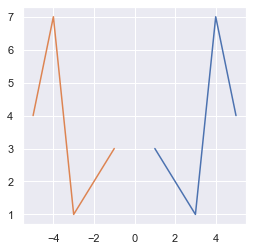

In [13]:
newPoints = points.dot(C)

plt.figure()
plt.plot(points[:, 0], points[:, 1])
plt.plot(newPoints[:, 0], newPoints[:, 1])
plt.show()

You can see that the transformation mirrored the initial shape.

# Conclusion

We have seen that the determinant of a matrix is a special value telling us a lot of things on the transformation corresponding to this matrix. Now hang on and go to the *last chapter* on the Principal Component Analysis (PCA).

# References

## Linear transformations

- [Nykamp DQ, “Determinants and linear transformations.” From Math Insight](https://mathinsight.org/determinant_linear_transformation)

- [Determinant intuition - SE](https://math.stackexchange.com/questions/668/whats-an-intuitive-way-to-think-about-the-determinant)

## Numpy

- [Numpy determinant](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.det.html)

